# ESD_thermotrace - parameter study


## Import libraries

In [16]:
# import all libraries and functions
from ESD_thermotrace_functions import *

# display plots below the related cell
%matplotlib inline
# # Alternatively, open an interactive window for every figure
# %matplotlib notebook 

# set white background and large fontsize for all plots
sns.set(style='ticks', context='talk')

## Make a table of x, y, z, age, error, erosion

In [75]:
ipf = 'input_highsierra'
opf = 'output_highsierra'
ws_data_filename = 'xyz_age_eros.xlsx'
f_map_filename = None
detrital_ages_filenames = ['dd_inyo_fine.xlsx']
ws_data = pd.read_excel(opf+'/'+ws_data_filename)
# print('IMPORTED TABLE:')
# ws_data

# drop scenarios
ws_data = ws_data[ws_data.columns[:-2]].copy()

def E_gauss(zarray,loc,Eratio,dev=500):
    '''
    Function to make a Gaussian distribution of erosion for a scenario with
    given Eratio (Emax/Emin),
    given the location of erosional focus (loc),
    given the array of positions (zarray)
    the 1sigma (dev) of the distribution by default is 500 meters (controls how wide is the peak)
    '''
    m = 1/(Eratio-1) # value at which the Gaussian curve gets flat (peak = 1)
    dist = (np.exp((-(zarray-loc)**2)/(dev)**2)+m)/(1+m) # after Nibourel et al. (2015)
    return dist/dist.min() # min must =1

# example scenarios for the submitted manuscript: x-fold increas and decrease in erosion at z m elevation
array = ws_data.z.values # get array of elevations
array.sort() # sort elevations
# calculate number of bins such that the width of each bin
# is proportional to the average error of age interpolation  
bins = int(np.rint((ws_data.age.max()-ws_data.age.min())/ws_data.age_u.mean()))

locs = np.arange(2000,4000,100) # at which elevetion should the erosional peak occur?
f = np.histogram(array,bins)[0].max()/np.histogram(array,bins)[0].min() # prominence of elevation peak
N = 2 # how many times f? ######################################################################################
f = f*N 
Eratios = np.ones(locs.size)*f
std = 500 # 1 sigma of bell curve, determines the width of the peak ############################################

labels=[] # list of scenario labels (in form of pdf)
for Zi in locs:
    for E in Eratios:
        label = 'E'+str(Zi)
        ws_data[label] = E_gauss(ws_data.z,Zi,E,dev=std)

# UNCOMMENT 2 LINEs BELOW TO PRESCRIBE AGE UNCERTAINTY ##########################################################
# age_u_pre = 0.2 # 0.2 = 20%
# ws_data.age_u = ws_data.age*age_u_pre

# save to excel and show
ws_data.to_excel(opf+'/ps_ws_data_temp.xlsx', index=False)

print('TABLE OF CATCHMENT DATA:')
ws_data

TABLE OF CATCHMENT DATA:


,x,y,z,age,age_u,Euni,E2000,E2100,E2200,E2300,...,E3000,E3100,E3200,E3300,E3400,E3500,E3600,E3700,E3800,E3900
0,392425.296213,4.050343e+06,1987,20.858132,4.171626,1,26.817859,25.546953,22.539380,18.433453,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,392395.296213,4.050343e+06,1992,20.974419,4.194884,1,26.828705,25.655691,22.721510,18.651345,...,1.012326,1.006996,1.003324,1.001371,1.000506,1.000169,1.000052,1.000015,1.000004,1.000001
2,392425.296213,4.050313e+06,1994,21.020934,4.204187,1,26.831598,25.697938,22.793572,18.738268,...,1.017380,1.009874,1.004695,1.001939,1.000715,1.000240,1.000074,1.000021,1.000005,1.000001
3,392485.296213,4.050283e+06,1994,21.020934,4.204187,1,26.831598,25.697938,22.793572,18.738268,...,1.017380,1.009874,1.004695,1.001939,1.000715,1.000240,1.000074,1.000021,1.000005,1.000001
4,392395.296213,4.050313e+06,1997,21.090706,4.218141,1,26.834388,25.759958,22.900800,18.868385,...,1.025095,1.014277,1.006798,1.002811,1.001039,1.000349,1.000107,1.000030,1.000008,1.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,390325.296213,4.047103e+06,3860,64.419333,12.883867,1,1.000002,1.000009,1.000032,1.000110,...,1.641409,3.014586,5.153764,8.156376,11.977250,16.340048,20.698578,24.316266,26.465233,26.670813
3246,390295.296213,4.047103e+06,3860,64.419333,12.883867,1,1.000002,1.000009,1.000032,1.000110,...,1.641409,3.014586,5.153764,8.156376,11.977250,16.340048,20.698578,24.316266,26.465233,26.670813
3247,390355.296213,4.047043e+06,3862,64.465847,12.893169,1,1.000001,1.000006,1.000021,1.000073,...,1.628546,2.988341,5.109360,8.092201,11.896515,16.251684,20.616485,24.256280,26.440391,26.686836
3248,390355.296213,4.047073e+06,3865,64.535620,12.907124,1,1.000000,1.000001,1.000005,1.000018,...,1.609525,2.949442,5.043383,7.996589,11.775878,16.119183,20.492817,24.165200,26.401649,26.709348


## Make grain populations for all erosion scenarios and related distributions

In [76]:
# ASSIGN PREFERRED VALUE FOR MULTIPLIER HERE #####################################################################
# This will affect the number of grains in each predicted detrital population,
# try starting with 1 and based on the plots re-run the code cell
multiplier = 1

# make dictionary of populations, one for each scenario
pops, scen_labels = make_pops_dict(opf+'/ps_ws_data_temp.xlsx', f_map_filename, multiplier)

# DEFINE REFERENCE SCENARIO HERE ##################################################################################
ref_scen = 'Euni' 
pops.move_to_end(ref_scen, last=False) # move ref_scen to first position in the dictionary

# also load the detrital data and make detrital populations
pops, dd, detr_labels = get_detr_pops(detrital_ages_filenames, pops, ipf)

# make dictionary of detrital distributions, one for each item of pops
dists = OrderedDict([(label, make_cdf(pop)) for label, pop in pops.items()])
    
# SPECIFY N. OF DETRITAL GRAIN AGES HERE ##########################################################################
num_grains = 52

# check if something detrital is there
if len(detrital_ages_filenames)<1:
    warnings.warn('\nYou have not specified any path to the detrital data.')

# # Plot distributions
# plot_distributions(pops, dists, ref_scen, detr_labels, opf+'/ps_distributions_.pdf', num_grains, show_DKW=True)

## Confidence in discerning between erosion scenarios and reference scenario as a function of sample size.

In [77]:
############################ DEFINE RANGE OF K VALUES AND N. OF ITERATIONS HERE ####################################
all_k = np.arange(30,150,5) # possible n. of dated grains (k) to consider
k_iter = 1000 # iterations per k value

# make dictionary of all probabilities
probs = get_probs(pops, dists, all_k, k_iter, scen_labels, ref_scen)

## Plot map of statistical power

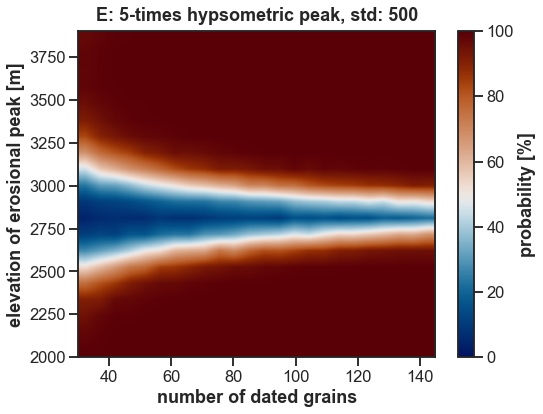

In [78]:
# make probability map
probmap = np.array([[probs['E'+str(Zi)][i] for i in np.arange(all_k.size)] for Zi in locs])
probmap = probmap[::-1]

# plot probability map
fig,ax = plt.subplots(figsize=(8,6))
im = ax.imshow(probmap,
               cmap=scm6.vik,
               vmin=0, vmax=100,
               extent=(all_k[0],all_k[-1],locs[0],locs[-1]),
               aspect='auto',
               interpolation='bilinear'
              )

ax.set_xlabel('number of dated grains', fontdict={'weight':'bold'})
ax.set_ylabel('elevation of erosional peak [m]', fontdict={'weight':'bold'})
ax.set_title('E: {}-times hypsometric peak, std: {}'.format(N,std), pad=10, fontdict={'weight':'bold'})

cbar = plt.colorbar(im)
cbar.set_label('probability [%]', fontdict={'weight':'bold'})

# save probability map? ########################################################################################
# age_u_str = '' # no prescribed uncertainty
# age_u_str = '_ageU20'
# np.savetxt(opf+'/statpower_map_gausspeak_N{}_std{}'.format(N,std,age_u_pre*100)+age_u_str+'.csv', probmap)
# fig.savefig(opf+'/statpower_map_gausspeak_N{}_std{}'.format(N,std,age_u_pre*100)+age_u_str+'.pdf', dpi=200)

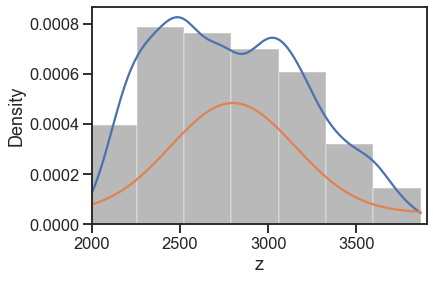

In [20]:
fig,ax = plt.subplots()
ax.hist(x=array,bins=bins, density=True, alpha=0.3, color='k')
sns.kdeplot(ws_data.z, ax=ax, cut=0)
ax.set(xlim=(2000,3900))
ax.plot(ws_data.z, ws_data.E2800/ws_data.E2800.sum())
# ax.plot(ws_data.z, x5)
# ax.plot(ws_data.z, ws_data.Euni/ws_data.Euni.sum())
# fig.savefig(opf+'/hypsometric_curve_g500.pdf', dpi=200)

## try plotting the confidence for a k_i against hipsometry

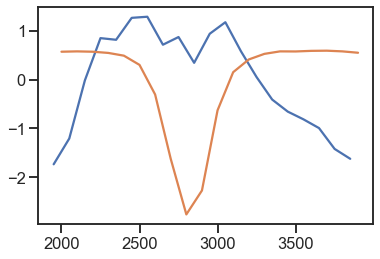

In [21]:
# get mean confidence at locations locs
Y = np.array([probmap[i,:].mean() for i in np.arange(probmap.shape[0])])
# normalize
Y = [(i-Y.mean())/Y.std() for i in Y]

# make pdf of Z, binning according to locs
Z = ws_data.z.values
qnt_binned = np.array([Z[Z<L].size/Z.size for L in locs])
qnt_w0 = np.append(np.zeros(1),qnt_binned)
pdf = np.array([v-qnt_w0[i] for i,v in enumerate(qnt_binned)])
pdf1 = [(i-pdf.mean())/pdf.std() for i in pdf]

plt.plot(locs-50,pdf1)
plt.plot(locs,Y[::-1]) # Y plotted upside down, to match locs